In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский)

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5 = прочее; 6 = нет данных).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

default - индикатор невозврата денежных средств

In [5]:
data = pd.read_csv('credit_card_default_analysis.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Задание 1

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?



In [69]:
ref = data[data['default']==0]['LIMIT_BAL'].values
no_ref = data[data['default']==1]['LIMIT_BAL'].values

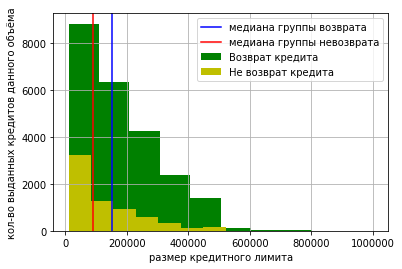

In [71]:
fig, ax = plt.subplots(1, 1)
ax.hist(ref, color='g', label='Возврат кредита');
ax.hist(no_ref, color='y', label='Не возврат кредита');
ax.axvline(np.median(ref), color='b', label='медиана группы возврата')
ax.axvline(np.median(no_ref), color='r', label='медиана группы невозврата')
ax.set_xlabel('размер кредитного лимита')
ax.set_ylabel('кол-во выданных кредитов данного объёма')
ax.grid()
ax.legend()
plt.show();

#### Проверим гепотезу о равенстве медианных значений кредитного лимита в двух группах (вернувших и не вернувших кредит).

Построим 95% доверительный интервал для разности медиан  применением метода бутстреп, в связи с отсутствием информации о распределениях выборок.

In [48]:
# постоение доверительных интервалов
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# генерация псевдовыборок методом бутстреп
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [72]:
np.random.seed(0)

# определение медиан для псевдоподвыборок для двух групп клиентов
median_ref = [np.median(i) for i in get_bootstrap_samples(ref, 1000)]
median_no_ref = [np.median(i) for i in get_bootstrap_samples(no_ref, 1000)]

#median_ref = map(np.median, get_bootstrap_samples(data[data['default']==0]['LIMIT_BAL'].values, 1000))
#median_no_ref = map(np.median, get_bootstrap_samples(data[data['default']==1]['LIMIT_BAL'].values, 1000))

In [73]:
# определние разности между медианами двух групп
delta_medians = [j-i for i,j in zip(median_no_ref, median_ref)]

In [74]:
print("95% доверительный интервал для медианы возвращённых кредитов:",  stat_intervals(median_ref, 0.05))
print("95% доверительный интервал для медианы не возвращённых кредитов:",  stat_intervals(median_no_ref, 0.05))
print("95% доверительный интервал для разности медиан:",  stat_intervals(delta_medians, 0.05))

95% доверительный интервал для медианы возвращённых кредитов: [ 150000.  150000.]
95% доверительный интервал для медианы не возвращённых кредитов: [ 80000.  90000.]
95% доверительный интервал для разности медиан: [ 60000.  70000.]


#### Доверительные интервал медиан двух групп не пересекаютя. Доверительный интервал для разности медиан не содержит 0. Гепотеза о равенстве медиан отвергается на уровне статистической значимости 0.05 

#### Проверим гепотезу о равенстве распределений кредитного лимита в двух группах (вернувших и не вернувших кредит).

Проверку гепотезы выполним с применением перестоновочного критерия для независимых выборок

In [99]:
np.random.shuffle(np.arange(50))

In [106]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = np.arange(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [107]:
print("p-value: %f" % permutation_test(ref, no_ref, max_permutations = 4000))

p-value: 0.000250


####  p-value ниже уровня значимости, на основании этого гипотеза о равенстве распределений отвергается

### Задание 2
Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

### Задание 3
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

### Задание 4
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение

### Задание 5
Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?